In [3]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
census = pd.read_csv("Coursework_clssf1.csv")

In [5]:
census.head()

Region  Residence Type  Family Composition  Population Base  Sex  Age  \
0       3               0                   3                2    0    5   
1       3               0                   0                2    0    0   
2       3               0                   3                2    1    6   
3       3               0                   5                2    0    5   
4       3               0                   3                2    1    0   

   Marital Status  Student  Country of Birth  Health  Ethnic Group  Religion  \
0               1        0                 2       2             5         1   
1               3        0                 2       2             5         6   
2               1        0                 2       5             5         1   
3               0        0                 2       1             5         1   
4               3        1                 2       5             5         6   

   Economic Activity  Occupation  Hours worked per week  No of hours  \
0                  7           6                      2            0   
1                  9           5                      2            0   
2                  7           6                      2            0   
3                  7           3                      2            0   
4                  9           5                      2            0   

   Approximated Social Grade  Indutry  
0                          3        6  
1                          4        7  
2                          1        6  
3                          3        0  
4                          4        7

In [6]:
#standardise the data 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(census.values)
scaled_features_census = pd.DataFrame(scaled_features, index=census.index, columns=census.columns)
scaled_features_census.describe()

Region  Residence Type  Family Composition  Population Base  \
count  5.697400e+05    5.697400e+05        5.697400e+05     5.697400e+05   
mean  -1.105461e-16    6.784415e-17       -2.374545e-17    -6.138898e-16   
std    1.000001e+00    1.000001e+00        1.000001e+00     1.000001e+00   
min   -1.590058e+00   -1.380438e-01       -1.801667e+00    -1.245627e+01   
25%   -8.674904e-01   -1.380438e-01       -5.050574e-01     1.177643e-01   
50%   -1.449226e-01   -1.380438e-01        1.432474e-01     1.177643e-01   
75%    5.776453e-01   -1.380438e-01        1.432474e-01     1.177643e-01   
max    1.661497e+00    7.244075e+00        2.088162e+00     1.177643e-01   

                Sex           Age  Marital Status       Student  \
count  5.697400e+05  5.697400e+05    5.697400e+05  5.697400e+05   
mean   1.117433e-17  1.301510e-16    6.505057e-17  1.029635e-16   
std    1.000001e+00  1.000001e+00    1.000001e+00  1.000001e+00   
min   -9.850107e-01 -1.342053e+00   -1.776171e+00 -5.343274e-01   
25%   -9.850107e-01 -8.914996e-01   -9.176139e-01 -5.343274e-01   
50%   -9.850107e-01  9.607496e-03    7.995008e-01 -5.343274e-01   
75%    1.015217e+00  9.107146e-01    7.995008e-01 -5.343274e-01   
max    1.015217e+00  1.811822e+00    1.658058e+00  1.871512e+00   

       Country of Birth        Health  Ethnic Group      Religion  \
count      5.697400e+05  5.697400e+05  5.697400e+05  5.697400e+05   
mean       6.145882e-17  2.175004e-17  2.494270e-17  2.693812e-17   
std        1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min       -4.630538e+00 -1.833997e+00 -2.945340e+00 -1.188819e+00   
25%        4.014103e-01 -6.932556e-01  3.954218e-01 -7.885192e-01   
50%        4.014103e-01 -6.932556e-01  3.954218e-01 -7.885192e-01   
75%        4.014103e-01  1.017857e+00  3.954218e-01  1.212982e+00   
max        4.014103e-01  1.017857e+00  3.954218e-01  2.413882e+00   

       Economic Activity    Occupation  Hours worked per week   No of hours  \
count       5.697400e+05  5.697400e+05           5.697400e+05  5.697400e+05   
mean        8.141298e-17 -1.639234e-16           3.112849e-16 -5.395605e-16   
std         1.000001e+00  1.000001e+00           1.000001e+00  1.000001e+00   
min        -1.067252e+00 -1.732937e+00          -1.366855e+00 -8.321093e-01   
25%        -1.067252e+00 -5.967020e-01          -1.366855e+00 -8.321093e-01   
50%        -2.621550e-01  1.607882e-01           3.149785e-01 -8.321093e-01   
75%         8.113071e-01  9.182783e-01           3.149785e-01  9.792127e-01   
max         1.348038e+00  1.675768e+00           1.996812e+00  2.186761e+00   

       Approximated Social Grade       Indutry  
count               5.697400e+05  5.697400e+05  
mean               -9.099097e-17 -4.150466e-17  
std                 1.000001e+00  1.000001e+00  
min                -1.496121e+00 -2.134346e+00  
25%                -7.780946e-01 -6.033569e-01  
50%                -6.006826e-02  9.038568e-03  
75%                 6.579581e-01  9.276318e-01  
max                 1.375984e+00  1.540027e+00

In [7]:
#######################################
###             k-means             ###
#######################################

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_features_census)

/Users/wiams/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

In [8]:
kmeans.cluster_centers_

array([[-0.00808885,  0.1282984 , -0.24964058, -0.30606123,  0.03006054,
        -1.17238798,  0.78099283,  1.3863275 , -0.08835045,  0.56280721,
        -0.23665289,  0.20595347,  1.09447399,  0.15112723,  0.3672847 ,
        -0.79518457,  0.9228069 ,  0.01590856],
       [ 0.0030139 , -0.04780393,  0.09301597,  0.11403828, -0.01120054,
         0.43683125, -0.29099759, -0.51654502,  0.03291934, -0.20970172,
         0.08817676, -0.07673817, -0.40780053, -0.05630994, -0.13685012,
         0.29628542, -0.34383745, -0.00592752]])

In [9]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


/Users/wiams/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wiams/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wiams/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wiams/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

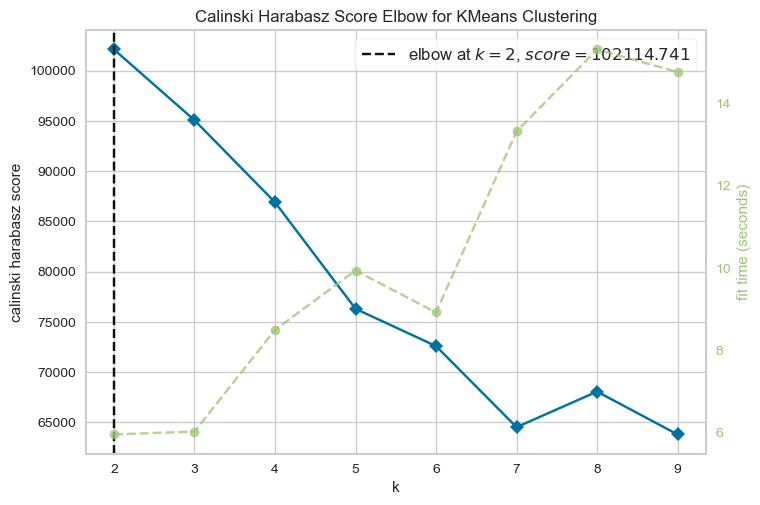

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [11]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz')

visualizer.fit(scaled_features_census)        # Fit the data to the visualizer
visualizer.show()                            # Finalize and render the figure

In [13]:
#kmeans = KMeans(n_clusters=2, random_state=0)
#kmeans.fit(scaled_features_census)

In [14]:
scaled_features_census.shape

(569740, 18)

In [15]:
scaled_features_census.head()

Region  Residence Type  Family Composition  Population Base       Sex  \
0 -0.506206       -0.138044            0.143247         0.117764 -0.985011   
1 -0.506206       -0.138044           -1.801667         0.117764 -0.985011   
2 -0.506206       -0.138044            0.143247         0.117764  1.015217   
3 -0.506206       -0.138044            1.439857         0.117764 -0.985011   
4 -0.506206       -0.138044            0.143247         0.117764  1.015217   

        Age  Marital Status   Student  Country of Birth    Health  \
0  0.910715       -0.917614 -0.534327           0.40141 -0.693256   
1 -1.342053        0.799501 -0.534327           0.40141 -0.693256   
2  1.361268       -0.917614 -0.534327           0.40141  1.017857   
3  0.910715       -1.776171 -0.534327           0.40141 -1.263626   
4 -1.342053        0.799501  1.871512           0.40141  1.017857   

   Ethnic Group  Religion  Economic Activity  Occupation  \
0      0.395422 -0.788519           0.811307    0.539533   
1      0.395422  1.212982           1.348038    0.160788   
2      0.395422 -0.788519           0.811307    0.539533   
3      0.395422 -0.788519           0.811307   -0.596702   
4      0.395422  1.212982           1.348038    0.160788   

   Hours worked per week  No of hours  Approximated Social Grade   Indutry  
0               0.314979    -0.832109                   0.657958 -0.297159  
1               0.314979    -0.832109                   1.375984  0.009039  
2               0.314979    -0.832109                  -0.778095 -0.297159  
3               0.314979    -0.832109                   0.657958 -2.134346  
4               0.314979    -0.832109                   1.375984  0.009039

In [16]:
kmeans.labels_

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

In [17]:
#append dataframe with cluster number
scaled_features_census['cluster'] = kmeans.labels_

In [18]:
kmeans.labels_ == 0

array([False,  True, False, ..., False, False, False])

In [19]:
#view proterties of each cluster
cluster1=scaled_features_census.query("cluster == 0")
cluster2=scaled_features_census.query("cluster == 1")

In [20]:
cluster1.head()

Region  Residence Type  Family Composition  Population Base       Sex  \
1 -0.506206       -0.138044           -1.801667         0.117764 -0.985011   
4 -0.506206       -0.138044            0.143247         0.117764  1.015217   
5 -0.506206       -0.138044            1.439857         0.117764 -0.985011   
6 -0.506206       -0.138044            1.439857         0.117764 -0.985011   
7 -0.506206       -0.138044           -1.801667         0.117764  1.015217   

        Age  Marital Status   Student  Country of Birth    Health  \
1 -1.342053        0.799501 -0.534327           0.40141 -0.693256   
4 -1.342053        0.799501  1.871512           0.40141  1.017857   
5 -0.891500        0.799501  1.871512           0.40141 -0.693256   
6 -0.891500        0.799501  1.871512           0.40141 -0.693256   
7 -0.891500        0.799501  1.871512           0.40141  1.017857   

   Ethnic Group  Religion  Economic Activity  Occupation  \
1      0.395422  1.212982           1.348038    0.160788   
4      0.395422  1.212982           1.348038    0.160788   
5      0.395422  1.212982          -0.798886    0.160788   
6      0.395422  1.212982          -0.798886    1.297023   
7      0.395422  1.212982           1.079673    0.160788   

   Hours worked per week  No of hours  Approximated Social Grade   Indutry  \
1               0.314979    -0.832109                   1.375984  0.009039   
4               0.314979    -0.832109                   1.375984  0.009039   
5               0.314979    -0.832109                  -0.778095  0.009039   
6               0.314979    -0.832109                  -0.778095  1.233830   
7               0.314979    -0.832109                  -0.778095  0.009039   

   cluster  
1        0  
4        0  
5        0  
6        0  
7        0

In [21]:
cluster1.shape

(154586, 19)

In [22]:
cluster2.head()

Region  Residence Type  Family Composition  Population Base       Sex  \
0  -0.506206       -0.138044            0.143247         0.117764 -0.985011   
2  -0.506206       -0.138044            0.143247         0.117764  1.015217   
3  -0.506206       -0.138044            1.439857         0.117764 -0.985011   
9  -0.506206       -0.138044            0.143247         0.117764  1.015217   
10 -0.506206       -0.138044            0.143247         0.117764  1.015217   

         Age  Marital Status   Student  Country of Birth    Health  \
0   0.910715       -0.917614 -0.534327           0.40141 -0.693256   
2   1.361268       -0.917614 -0.534327           0.40141  1.017857   
3   0.910715       -1.776171 -0.534327           0.40141 -1.263626   
9   1.361268       -0.917614 -0.534327           0.40141 -1.263626   
10  1.811822       -0.917614 -0.534327           0.40141 -1.263626   

    Ethnic Group  Religion  Economic Activity  Occupation  \
0       0.395422 -0.788519           0.811307    0.539533   
2       0.395422 -0.788519           0.811307    0.539533   
3       0.395422 -0.788519           0.811307   -0.596702   
9       0.395422 -0.788519           0.811307   -0.596702   
10      0.395422 -0.788519           0.811307    1.675768   

    Hours worked per week  No of hours  Approximated Social Grade   Indutry  \
0                0.314979    -0.832109                   0.657958 -0.297159   
2                0.314979    -0.832109                  -0.778095 -0.297159   
3                0.314979    -0.832109                   0.657958 -2.134346   
9                0.314979    -0.832109                   0.657958 -0.297159   
10               0.314979    -0.832109                  -0.060068 -0.297159   

    cluster  
0         1  
2         1  
3         1  
9         1  
10        1

In [23]:
cluster2.shape

(415154, 19)

In [24]:
cluster2.describe()

Region  Residence Type  Family Composition  Population Base  \
count  415154.000000   415154.000000       415154.000000    415154.000000   
mean        0.002958       -0.047713            0.092944         0.113978   
std         0.999717        0.811587            1.009107         0.218152   
min        -1.590058       -0.138044           -1.801667       -12.456269   
25%        -0.867490       -0.138044            0.143247         0.117764   
50%        -0.144923       -0.138044            0.143247         0.117764   
75%         0.577645       -0.138044            0.143247         0.117764   
max         1.661497        7.244075            2.088162         0.117764   

                 Sex            Age  Marital Status        Student  \
count  415154.000000  415154.000000   415154.000000  415154.000000   
mean       -0.011218       0.436674       -0.290816      -0.516484   
std         0.999769       0.797562        1.023027       0.206420   
min        -0.985011      -0.891500       -1.776171      -0.534327   
25%        -0.985011       0.009607       -0.917614      -0.534327   
50%        -0.985011       0.460161       -0.917614      -0.534327   
75%         1.015217       0.910715        0.799501      -0.534327   
max         1.015217       1.811822        1.658058       1.871512   

       Country of Birth         Health   Ethnic Group       Religion  \
count     415154.000000  415154.000000  415154.000000  415154.000000   
mean           0.032845      -0.209590       0.088036      -0.076679   
std            0.889642       0.995347       0.911469       0.990380   
min           -2.114564      -1.833997      -2.945340      -1.188819   
25%            0.401410      -0.693256       0.395422      -0.788519   
50%            0.401410      -0.693256       0.395422      -0.788519   
75%            0.401410       1.017857       0.395422       1.212982   
max            0.401410       1.017857       0.395422       2.413882   

       Economic Activity     Occupation  Hours worked per week    No of hours  \
count      415154.000000  415154.000000          415154.000000  415154.000000   
mean           -0.407746      -0.056279              -0.136748       0.296136   
std             0.790374       1.138135               1.130136       1.017649   
min            -1.067252      -1.732937              -1.366855      -0.832109   
25%            -1.067252      -0.975447              -1.366855      -0.832109   
50%            -1.067252      -0.217957               0.314979       0.425753   
75%             0.542942       0.918278               0.314979       1.180471   
max             1.079673       1.675768               1.996812       2.186761   

       Approximated Social Grade        Indutry   cluster  
count              415154.000000  415154.000000  415154.0  
mean                   -0.343737      -0.005952       1.0  
std                     0.813963       1.123175       0.0  
min                    -1.496121      -2.134346       1.0  
25%                    -0.778095      -0.909555       1.0  
50%                    -0.778095      -0.297159       1.0  
75%                     0.657958       0.927632       1.0  
max                     1.375984       1.540027       1.0

In [25]:
kmeans.cluster_centers_

array([[-0.00808885,  0.1282984 , -0.24964058, -0.30606123,  0.03006054,
        -1.17238798,  0.78099283,  1.3863275 , -0.08835045,  0.56280721,
        -0.23665289,  0.20595347,  1.09447399,  0.15112723,  0.3672847 ,
        -0.79518457,  0.9228069 ,  0.01590856],
       [ 0.0030139 , -0.04780393,  0.09301597,  0.11403828, -0.01120054,
         0.43683125, -0.29099759, -0.51654502,  0.03291934, -0.20970172,
         0.08817676, -0.07673817, -0.40780053, -0.05630994, -0.13685012,
         0.29628542, -0.34383745, -0.00592752]])

In [26]:
cluster1_mean = kmeans.cluster_centers_[0]
cluster2_mean = kmeans.cluster_centers_[1]

In [27]:
cluster1.keys()

Index(['Region', 'Residence Type', 'Family Composition', 'Population Base',
       'Sex', 'Age', 'Marital Status', 'Student', 'Country of Birth', 'Health',
       'Ethnic Group', 'Religion', 'Economic Activity', 'Occupation',
       'Hours worked per week', 'No of hours', 'Approximated Social Grade',
       'Indutry', 'cluster'],
      dtype='object')

In [28]:
len(cluster1.keys())

19

In [29]:
cluster1_mean

array([-0.00808885,  0.1282984 , -0.24964058, -0.30606123,  0.03006054,
       -1.17238798,  0.78099283,  1.3863275 , -0.08835045,  0.56280721,
       -0.23665289,  0.20595347,  1.09447399,  0.15112723,  0.3672847 ,
       -0.79518457,  0.9228069 ,  0.01590856])

In [30]:
cluster2_mean

array([ 0.0030139 , -0.04780393,  0.09301597,  0.11403828, -0.01120054,
        0.43683125, -0.29099759, -0.51654502,  0.03291934, -0.20970172,
        0.08817676, -0.07673817, -0.40780053, -0.05630994, -0.13685012,
        0.29628542, -0.34383745, -0.00592752])

In [32]:
cluster1_mean_p1 = cluster1_mean[:9]

In [33]:
cluster1_mean_p1

array([-0.00808885,  0.1282984 , -0.24964058, -0.30606123,  0.03006054,
       -1.17238798,  0.78099283,  1.3863275 , -0.08835045])

In [34]:
cluster2_mean_p1 = cluster2_mean[:9]

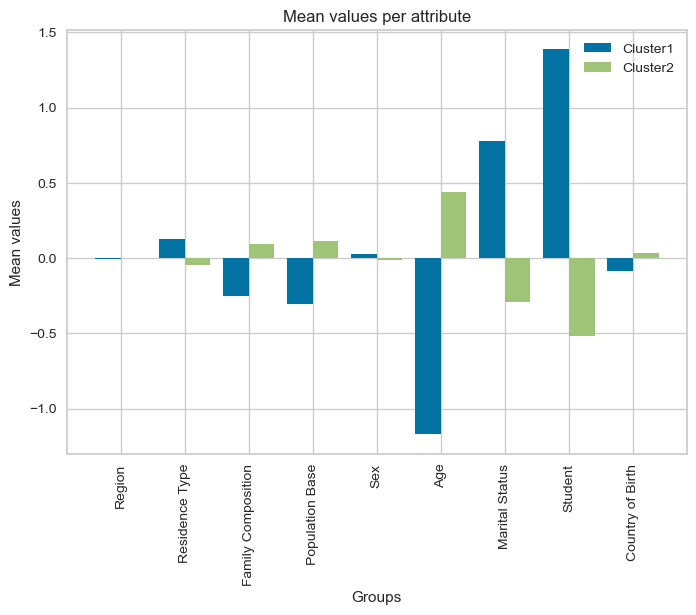

In [35]:
X = cluster1.keys()[:9]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, cluster1_mean_p1, 0.4, label = 'Cluster1')
plt.bar(X_axis + 0.2, cluster2_mean_p1, 0.4, label = 'Cluster2')
  
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
#plt.subplots_adjust(bottom=0.1)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()

In [36]:
cluster1_mean_p2 = cluster1_mean[9:]
cluster2_mean_p2 = cluster2_mean[9:]

In [37]:
cluster1_mean_p2

array([ 0.56280721, -0.23665289,  0.20595347,  1.09447399,  0.15112723,
        0.3672847 , -0.79518457,  0.9228069 ,  0.01590856])

In [38]:
cluster1.keys()[9:-1]

Index(['Health', 'Ethnic Group', 'Religion', 'Economic Activity', 'Occupation',
       'Hours worked per week', 'No of hours', 'Approximated Social Grade',
       'Indutry'],
      dtype='object')

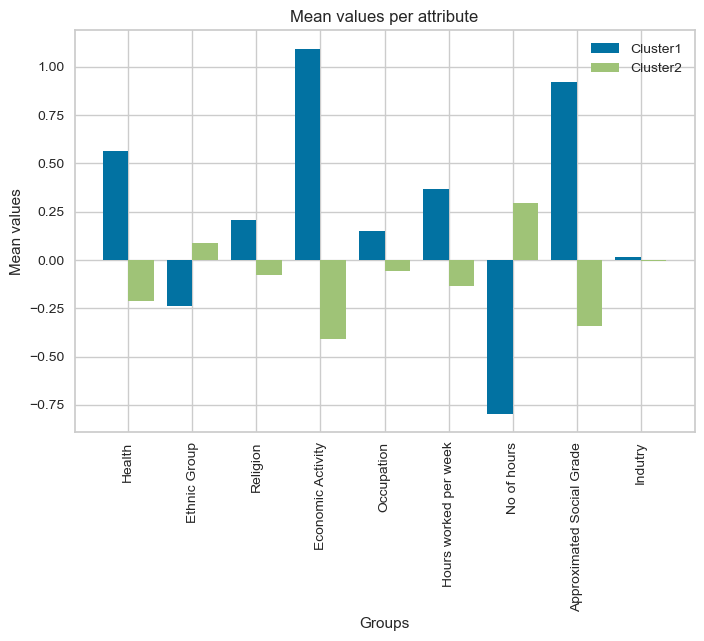

In [39]:
X = cluster1.keys()[9:-1]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, cluster1_mean_p2, 0.4, label = 'Cluster1')
plt.bar(X_axis + 0.2, cluster2_mean_p2, 0.4, label = 'Cluster2')
  
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()

In [41]:
######################################################
###             Hierarchical Clustering            ###
######################################################

from sklearn.cluster import AgglomerativeClustering

X = scaled_features_census.sample(frac=0.01, replace=False, random_state=1)

# setting distance_threshold=0 ensures we compute the full tree.
cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

#change the parameters
#cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

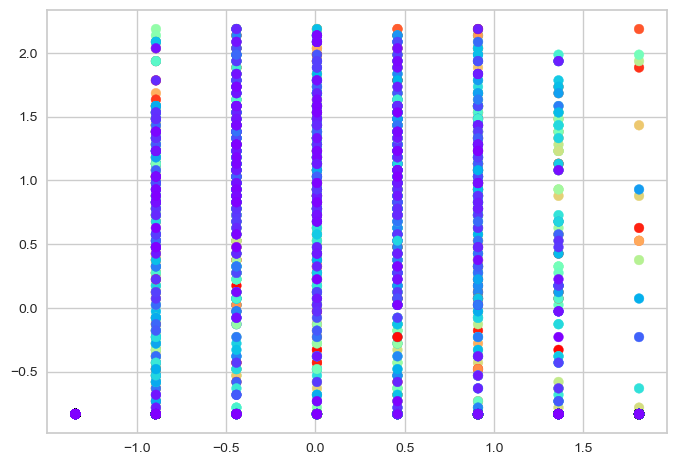

In [42]:
plt.scatter(X['Age'],X['No of hours'], c=cluster.labels_, cmap='rainbow')

In [43]:
cluster.labels_

array([3775, 3079, 5205, ...,    3,    1,    0])

In [44]:
#change the parameters
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster.fit_predict(X)

array([1, 0, 1, ..., 1, 1, 2])

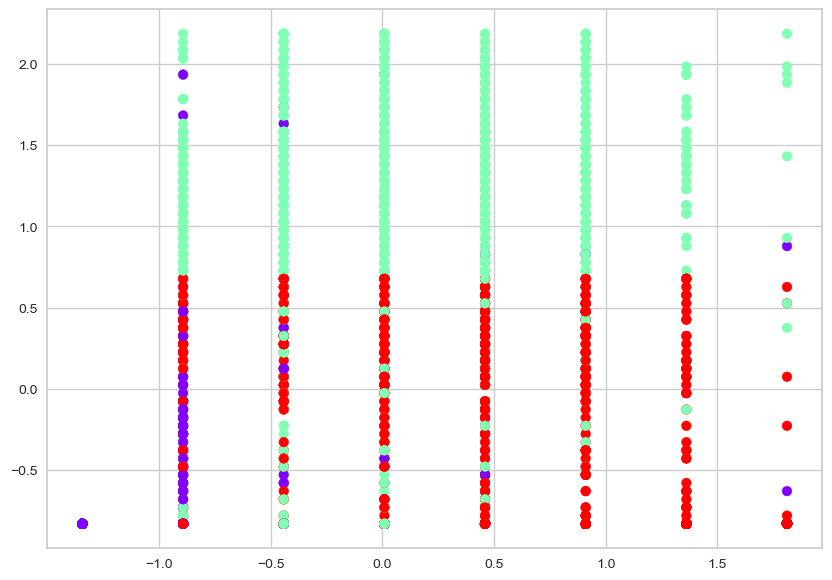

In [45]:
plt.figure(figsize=(10, 7))
plt.scatter(X['Age'],X['No of hours'], c=cluster.labels_, cmap='rainbow')

In [46]:
#append dataframe with cluster number
X['cluster_no'] = cluster.labels_

In [47]:
X.head()

Region  Residence Type  Family Composition  Population Base  \
257725 -0.867490       -0.138044            0.143247         0.117764   
298417  1.300213        7.244075            0.791552       -12.456269   
440058  0.216361       -0.138044            0.143247         0.117764   
352710 -1.590058       -0.138044            0.143247         0.117764   
150562  1.300213       -0.138044            0.143247         0.117764   

             Sex       Age  Marital Status   Student  Country of Birth  \
257725 -0.985011  0.009607       -0.917614 -0.534327         -2.114564   
298417  1.015217 -1.342053        0.799501  1.871512         -2.114564   
440058  1.015217 -0.440946       -0.917614 -0.534327         -2.114564   
352710 -0.985011 -0.440946       -0.917614 -0.534327          0.401410   
150562  1.015217  0.910715       -0.917614 -0.534327          0.401410   

          Health  Ethnic Group  Religion  Economic Activity  Occupation  \
257725  1.017857     -2.945340 -0.788519           0.274576    0.918278   
298417  1.017857      0.395422  1.613282           1.348038    0.160788   
440058  1.017857      0.395422 -0.788519          -1.067252   -0.217957   
352710 -1.263626      0.395422 -0.788519          -1.067252    0.918278   
150562 -0.693256      0.395422  1.212982           0.811307    0.918278   

        Hours worked per week  No of hours  Approximated Social Grade  \
257725               0.314979    -0.832109                  -1.496121   
298417               0.314979    -0.832109                   1.375984   
440058              -1.366855     1.130156                  -1.496121   
352710               1.996812     0.224495                  -1.496121   
150562               0.314979    -0.832109                  -0.778095   

         Indutry  cluster  cluster_no  
257725 -1.215752        1           1  
298417  0.009039        0           0  
440058 -0.909555        1           1  
352710 -1.215752        1           2  
150562 -1.215752        1           2

In [48]:
X.describe()

Region  Residence Type  Family Composition  Population Base  \
count  5697.000000     5697.000000         5697.000000      5697.000000   
mean     -0.013333       -0.003282           -0.009924         0.017340   
std       0.995849        0.988353            0.997626         0.918398   
min      -1.590058       -0.138044           -1.801667       -12.456269   
25%      -0.867490       -0.138044           -0.505057         0.117764   
50%      -0.144923       -0.138044            0.143247         0.117764   
75%       0.577645       -0.138044            0.143247         0.117764   
max       1.661497        7.244075            2.088162         0.117764   

               Sex          Age  Marital Status      Student  \
count  5697.000000  5697.000000     5697.000000  5697.000000   
mean      0.023003    -0.003442        0.007102     0.000304   
std       1.000171     1.001690        0.988010     1.000291   
min      -0.985011    -1.342053       -1.776171    -0.534327   
25%      -0.985011    -0.891500       -0.917614    -0.534327   
50%       1.015217     0.009607        0.799501    -0.534327   
75%       1.015217     0.910715        0.799501    -0.534327   
max       1.015217     1.811822        1.658058     1.871512   

       Country of Birth       Health  Ethnic Group     Religion  \
count       5697.000000  5697.000000   5697.000000  5697.000000   
mean           0.007034    -0.003044     -0.007792     0.026064   
std            0.983866     1.000363      1.010222     1.008368   
min           -4.630538    -1.833997     -2.945340    -1.188819   
25%            0.401410    -0.693256      0.395422    -0.788519   
50%            0.401410    -0.693256      0.395422    -0.788519   
75%            0.401410     1.017857      0.395422     1.212982   
max            0.401410     1.017857      0.395422     2.413882   

       Economic Activity   Occupation  Hours worked per week  No of hours  \
count        5697.000000  5697.000000            5697.000000  5697.000000   
mean            0.006069    -0.009072              -0.003410    -0.011057   
std             0.999468     1.001929               0.998469     0.993759   
min            -1.067252    -1.732937              -1.366855    -0.832109   
25%            -1.067252    -0.596702              -1.366855    -0.832109   
50%            -0.262155     0.160788               0.314979    -0.832109   
75%             0.811307     0.918278               0.314979     0.979213   
max             1.348038     1.675768               1.996812     2.186761   

       Approximated Social Grade      Indutry      cluster   cluster_no  
count                5697.000000  5697.000000  5697.000000  5697.000000  
mean                    0.004966    -0.010095     0.727400     1.059154  
std                     0.999870     1.001390     0.445336     0.777929  
min                    -1.496121    -2.134346     0.000000     0.000000  
25%                    -0.778095    -0.603357     0.000000     0.000000  
50%                    -0.060068     0.009039     1.000000     1.000000  
75%                     0.657958     0.927632     1.000000     2.000000  
max                     1.375984     1.540027     1.000000     2.000000

In [49]:
#save each cluster data separately
cluster1=X.query("cluster_no == 0")
cluster2=X.query("cluster_no == 1")
cluster3=X.query("cluster_no == 2")

In [50]:
cluster1.describe()

Region  Residence Type  Family Composition  Population Base  \
count  1565.000000     1565.000000         1565.000000      1565.000000   
mean     -0.025110        0.352525           -0.227094        -0.247807   
std       1.002775        1.839278            0.914979         1.724767   
min      -1.590058       -0.138044           -1.801667       -12.456269   
25%      -0.867490       -0.138044           -1.153362         0.117764   
50%      -0.144923       -0.138044            0.143247         0.117764   
75%       0.577645       -0.138044            0.143247         0.117764   
max       1.661497        7.244075            2.088162         0.117764   

               Sex          Age  Marital Status      Student  \
count  1565.000000  1565.000000     1565.000000  1565.000000   
mean      0.098819    -1.112314        0.767134     1.362673   
std       0.996923     0.531578        0.304535     0.982794   
min      -0.985011    -1.342053       -1.776171    -0.534327   
25%      -0.985011    -1.342053        0.799501     1.871512   
50%       1.015217    -1.342053        0.799501     1.871512   
75%       1.015217    -0.891500        0.799501     1.871512   
max       1.015217     1.811822        1.658058     1.871512   

       Country of Birth       Health  Ethnic Group     Religion  \
count       1565.000000  1565.000000   1565.000000  1565.000000   
mean          -0.037478     0.522928     -0.180086     0.202895   
std            1.178891     0.810436      1.130942     1.002970   
min           -4.630538    -1.833997     -2.945340    -1.188819   
25%            0.401410    -0.122885      0.395422    -0.788519   
50%            0.401410     1.017857      0.395422     0.412381   
75%            0.401410     1.017857      0.395422     1.212982   
max            0.401410     1.017857      0.395422     2.413882   

       Economic Activity   Occupation  Hours worked per week  No of hours  \
count        1565.000000  1565.000000            1565.000000  1565.000000   
mean            1.104194     0.141185               0.358502    -0.782984   
std             0.592979     0.414674               0.272975     0.258910   
min            -1.067252    -1.732937              -1.366855    -0.832109   
25%             1.079673     0.160788               0.314979    -0.832109   
50%             1.348038     0.160788               0.314979    -0.832109   
75%             1.348038     0.160788               0.314979    -0.832109   
max             1.348038     1.675768               1.996812     2.035817   

       Approximated Social Grade      Indutry      cluster  cluster_no  
count                1565.000000  1565.000000  1565.000000      1565.0  
mean                    0.968568    -0.009549     0.038339         0.0  
std                     0.835207     0.552344     0.192074         0.0  
min                    -1.496121    -2.134346     0.000000         0.0  
25%                     1.375984     0.009039     0.000000         0.0  
50%                     1.375984     0.009039     0.000000         0.0  
75%                     1.375984     0.009039     0.000000         0.0  
max                     1.375984     1.540027     1.000000         0.0

In [51]:
cluster2.describe()

Region  Residence Type  Family Composition  Population Base  \
count  2230.000000    2.230000e+03         2230.000000     2.230000e+03   
mean     -0.053225   -1.380438e-01            0.008063     1.177643e-01   
std       0.978850    2.859465e-15            1.031436     4.080985e-15   
min      -1.590058   -1.380438e-01           -1.801667     1.177643e-01   
25%      -0.867490   -1.380438e-01            0.143247     1.177643e-01   
50%      -0.144923   -1.380438e-01            0.143247     1.177643e-01   
75%       0.577645   -1.380438e-01            0.143247     1.177643e-01   
max       1.661497   -1.380438e-01            2.088162     1.177643e-01   

               Sex          Age  Marital Status      Student  \
count  2230.000000  2230.000000     2230.000000  2230.000000   
mean      0.172072     0.119720       -0.290444    -0.501962   
std       0.987941     0.637879        0.934192     0.277224   
min      -0.985011    -0.891500       -1.776171    -0.534327   
25%      -0.985011    -0.440946       -0.917614    -0.534327   
50%       1.015217     0.009607       -0.917614    -0.534327   
75%       1.015217     0.460161        0.799501    -0.534327   
max       1.015217     1.811822        1.658058     1.871512   

       Country of Birth       Health  Ethnic Group     Religion  \
count       2230.000000  2230.000000   2230.000000  2230.000000   
mean          -0.291329     0.055899     -0.215803     0.062523   
std            1.124096     0.957977      1.223465     1.017221   
min           -2.114564    -1.833997     -2.945340    -1.188819   
25%           -2.114564    -0.693256      0.395422    -0.788519   
50%            0.401410    -0.693256      0.395422    -0.788519   
75%            0.401410     1.017857      0.395422     1.212982   
max            0.401410     1.017857      0.395422     2.413882   

       Economic Activity   Occupation  Hours worked per week  No of hours  \
count        2230.000000  2230.000000            2230.000000  2230.000000   
mean           -0.834628    -0.036907              -0.901900     0.986410   
std             0.483375     1.140120               0.831862     0.784321   
min            -1.067252    -1.732937              -1.366855    -0.832109   
25%            -1.067252    -1.354192              -1.366855     0.828269   
50%            -1.067252    -0.217957              -1.366855     1.130156   
75%            -0.798886     0.918278              -0.525938     1.482358   
max             1.079673     1.675768               1.996812     2.186761   

       Approximated Social Grade      Indutry      cluster  cluster_no  
count                2230.000000  2230.000000  2230.000000      2230.0  
mean                   -0.520185     0.010137     0.989686         1.0  
std                     0.755738     1.122506     0.101055         0.0  
min                    -1.496121    -2.134346     0.000000         1.0  
25%                    -0.778095    -0.909555     1.000000         1.0  
50%                    -0.778095     0.009039     1.000000         1.0  
75%                    -0.060068     0.927632     1.000000         1.0  
max                     0.657958     1.540027     1.000000         1.0

In [52]:
cluster3.describe()

Region  Residence Type  Family Composition  Population Base  \
count  1902.000000    1.902000e+03         1902.000000     1.902000e+03   
mean      0.043127   -1.380438e-01            0.147679     1.177643e-01   
std       1.007748    5.913492e-15            0.990887     4.497586e-15   
min      -1.590058   -1.380438e-01           -1.801667     1.177643e-01   
25%      -0.867490   -1.380438e-01            0.143247     1.177643e-01   
50%       0.216361   -1.380438e-01            0.143247     1.177643e-01   
75%       0.938929   -1.380438e-01            1.439857     1.177643e-01   
max       1.661497   -1.380438e-01            2.088162     1.177643e-01   

               Sex          Age  Marital Status      Student  \
count  1902.000000  1902.000000     1902.000000  1902.000000   
mean     -0.214155     0.764557       -0.269408    -0.531798   
std       0.973739     0.822606        1.081388     0.077994   
min      -0.985011    -0.891500       -1.776171    -0.534327   
25%      -0.985011     0.009607       -0.917614    -0.534327   
50%      -0.985011     0.910715       -0.917614    -0.534327   
75%       1.015217     1.361268        0.799501    -0.534327   
max       1.015217     1.811822        1.658058     1.871512   

       Country of Birth       Health  Ethnic Group     Religion  \
count       1902.000000  1902.000000   1902.000000  1902.000000   
mean           0.393473    -0.504931      0.377857    -0.162182   
std            0.141125     0.947741      0.162674     0.971096   
min           -2.114564    -1.833997     -2.277188    -1.188819   
25%            0.401410    -1.263626      0.395422    -0.788519   
50%            0.401410    -0.693256      0.395422    -0.788519   
75%            0.401410     0.447486      0.395422     1.212982   
max            0.401410     1.017857      0.395422     2.413882   

       Economic Activity   Occupation  Hours worked per week  No of hours  \
count        1902.000000  1902.000000            1902.000000  1902.000000   
mean            0.088188    -0.100072               0.752238    -0.545380   
std             0.775434     1.146507               0.698798     0.489132   
min            -1.067252    -1.732937               0.314979    -0.832109   
25%            -0.530521    -0.975447               0.314979    -0.832109   
50%             0.274576    -0.217957               0.314979    -0.832109   
75%             0.811307     0.918278               1.155895    -0.341543   
max             1.079673     1.675768               1.996812     0.677326   

       Approximated Social Grade      Indutry      cluster  cluster_no  
count                1902.000000  1902.000000  1902.000000      1902.0  
mean                   -0.172189    -0.034267     0.986856         2.0  
std                     0.795374     1.129231     0.113922         0.0  
min                    -1.496121    -2.134346     0.000000         2.0  
25%                    -0.778095    -0.909555     1.000000         2.0  
50%                    -0.060068    -0.297159     1.000000         2.0  
75%                     0.657958     0.927632     1.000000         2.0  
max                     0.657958     1.540027     1.000000         2.0

In [53]:
cluster1_mean = np.array(cluster1.mean())
cluster2_mean = np.array(cluster2.mean())

In [54]:
cluster1_mean

array([-0.02511021,  0.3525251 , -0.22709411, -0.24780662,  0.09881896,
       -1.11231398,  0.7671335 ,  1.362673  , -0.03747843,  0.52292782,
       -0.18008581,  0.20289526,  1.10419424,  0.14118538,  0.35850202,
       -0.78298437,  0.96856759, -0.00954852,  0.03833866,  0.        ])

In [55]:
cluster1_mean_p1 = cluster1_mean[:9]
cluster2_mean_p1 = cluster2_mean[:9]

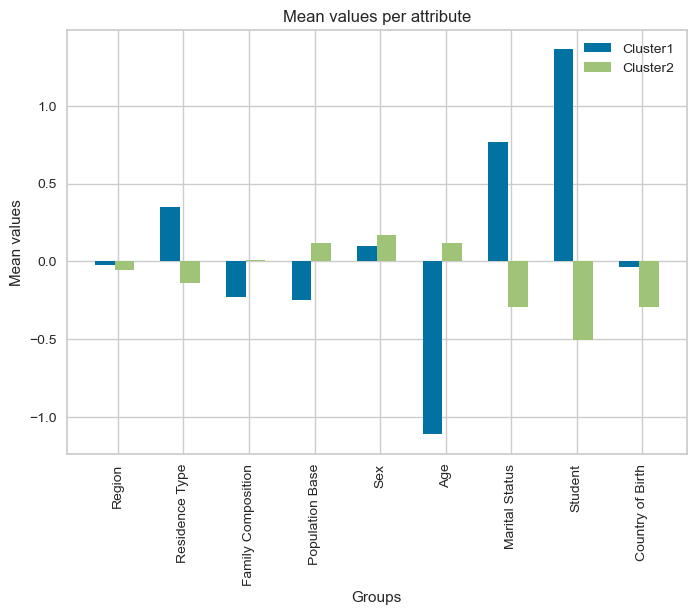

In [56]:
X = cluster1.keys()[:9]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, cluster1_mean_p1, 0.3, label = 'Cluster1')
plt.bar(X_axis + 0.1, cluster2_mean_p1, 0.3, label = 'Cluster2')
  
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
#plt.subplots_adjust(bottom=0.1)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()




In [57]:
cluster1.keys()

Index(['Region', 'Residence Type', 'Family Composition', 'Population Base',
       'Sex', 'Age', 'Marital Status', 'Student', 'Country of Birth', 'Health',
       'Ethnic Group', 'Religion', 'Economic Activity', 'Occupation',
       'Hours worked per week', 'No of hours', 'Approximated Social Grade',
       'Indutry', 'cluster', 'cluster_no'],
      dtype='object')

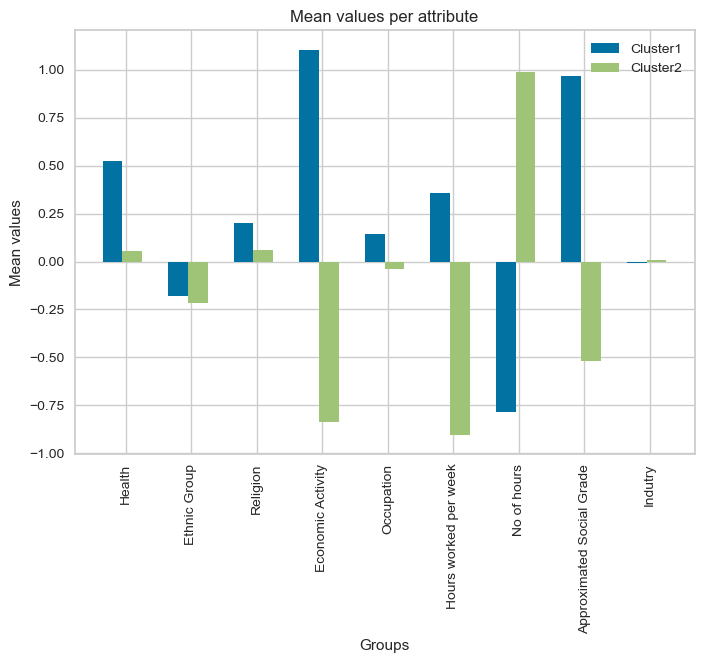

In [58]:
cluster1_mean_p2 = cluster1_mean[9:-2]
cluster2_mean_p2 = cluster2_mean[9:-2]


X = cluster1.keys()[9:-2]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, cluster1_mean_p2, 0.3, label = 'Cluster1')
plt.bar(X_axis + 0.1, cluster2_mean_p2, 0.3, label = 'Cluster2')

  
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()